In [160]:
#importing librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dataset Exploration

In [161]:
#dataset
df = pd.read_csv("Ireland House Price Final (1).csv")

In [162]:
#Displays the first 5 rows of the dataset
df.head()

,ID,property_scope,availability,location,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$
0,0,Extended Coverage,17-Oct,Fingal,2 BED,1056,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4 Bedroom,2600,5.0,3.0,No,D,Yes,523.846154
2,2,Constructed Space,Ready To Move,Dun Laoghaire,3 BED,1440,2.0,3.0,No,G,Yes,488.680556
3,3,Extended Coverage,Ready To Move,South Dublin,3 BED,1521,3.0,1.0,No,G,Yes,708.908613
4,4,Extended Coverage,Ready To Move,DCC,2 BED,1200,2.0,1.0,No,F,Yes,482.375000


In [163]:
df.shape

(13320, 12)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13320 non-null  int64  
 1   property_scope        13320 non-null  object 
 2   availability          13320 non-null  object 
 3   location              13319 non-null  object 
 4   size                  13304 non-null  object 
 5   total_sqft            13320 non-null  object 
 6   bath                  13247 non-null  float64
 7   balcony               12711 non-null  float64
 8   buying or not buying  13320 non-null  object 
 9   BER                   13320 non-null  object 
 10  Renovation needed     13320 non-null  object 
 11  price-per-sqft-$      13074 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


In [165]:
df.describe()

,ID,bath,balcony,price-per-sqft-$
count,13320.000000,13247.000000,12711.000000,1.307400e+04
mean,6659.500000,2.692610,1.584376,1.427913e+03
std,3845.297128,1.341458,0.817263,4.611435e+04
min,0.000000,1.000000,0.000000,3.039868e+01
25%,3329.750000,2.000000,1.000000,4.841873e+02
50%,6659.500000,2.000000,2.000000,6.190909e+02
75%,9989.250000,3.000000,2.000000,8.338172e+02
max,13319.000000,40.000000,3.000000,4.953333e+06


# Correlation heatmap for numeric columns

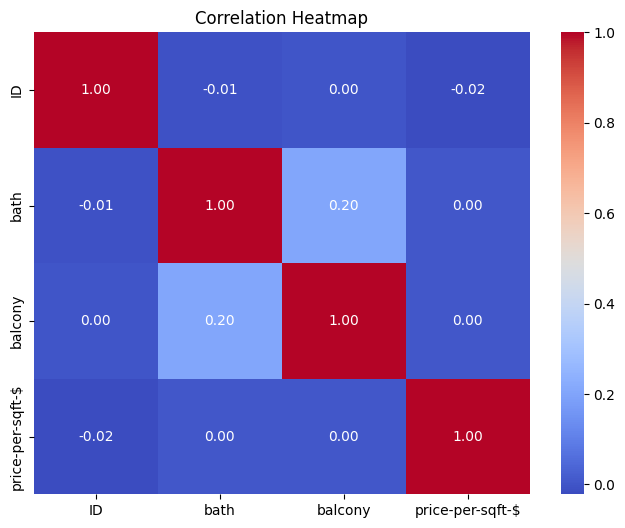

In [166]:
# Filter numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Correlation heatmap for numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Treating Null Values

In [167]:
df.isnull().sum()

,0
ID,0
property_scope,0
availability,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
buying or not buying,0
BER,0


In [168]:
# Drop the row where 'location' column has a null value
#because in a large dataset one null value wont affect the whole dataset by dropping the row
df.dropna(subset=['location'], inplace=True)

# Verify the change
print(df.isnull().sum())


ID                        0
property_scope            0
availability              0
location                  0
size                     16
total_sqft                0
bath                     73
balcony                 609
buying or not buying      0
BER                       0
Renovation needed         0
price-per-sqft-$        246
dtype: int64


In [169]:
# Remove the word "BED" from the 'size' column
df['size'] = df['size'].str.replace('BED', '').str.strip()


In [170]:
df.isnull().sum()

,0
ID,0
property_scope,0
availability,0
location,0
size,16
total_sqft,0
bath,73
balcony,609
buying or not buying,0
BER,0


In [171]:
# Drop rows with null values in the 'size' column
df = df.dropna(subset=['size'])


In [172]:
# Calculate the mean of the 'balcony' column
balcony_mean = df['balcony'].mean()

# Fill the null values with the mean
df['balcony'] = df['balcony'].fillna(balcony_mean)


<ipython-input-172-60eea0bfa611>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony'] = df['balcony'].fillna(balcony_mean)


In [173]:
df.isnull().sum()

,0
ID,0
property_scope,0
availability,0
location,0
size,0
total_sqft,0
bath,57
balcony,0
buying or not buying,0
BER,0


In [174]:
# Drop rows where 'price_per_sqft' is null
df = df.dropna(subset=['price-per-sqft-$'])


In [175]:
# Remove extra spaces
df['size'] = df['size'].str.replace('Bedroom', '', regex=False).str.strip()

# Check the first few rows to verify the changes
print(df['size'].head())


0    2
1    4
2    3
3    3
4    2
Name: size, dtype: object


In [176]:
df = df.dropna(subset=['bath'])

In [177]:
df.isnull().sum()

,0
ID,0
property_scope,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
buying or not buying,0
BER,0


# Categorical to NUmerical


In [178]:
df['buying or not buying']=df['buying or not buying'].map({'No':0,'Yes':1})

<ipython-input-178-ca267ad1aa6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buying or not buying']=df['buying or not buying'].map({'No':0,'Yes':1})


In [179]:
# Map 'Yes' to 1, 'No' to 0, and 'Maybe' to 2
df['Renovation needed'] = df['Renovation needed'].map({'Yes': 1, 'No': 0, 'Maybe': 2})

# Ensure the datatype is integer
df['Renovation needed'] = df['Renovation needed'].astype(int)

# Check the changes
print(df['Renovation needed'].head())
print(df['Renovation needed'].dtype)  # To confirm the datatype


0    0
1    1
2    1
3    1
4    1
Name: Renovation needed, dtype: int64
int64


<ipython-input-179-bf578a362b6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Renovation needed'] = df['Renovation needed'].map({'Yes': 1, 'No': 0, 'Maybe': 2})
<ipython-input-179-bf578a362b6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Renovation needed'] = df['Renovation needed'].astype(int)


In [180]:
df.head()

,ID,property_scope,availability,location,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$
0,0,Extended Coverage,17-Oct,Fingal,2,1056,2.0,1.0,0,A,0,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4,2600,5.0,3.0,0,D,1,523.846154
2,2,Constructed Space,Ready To Move,Dun Laoghaire,3,1440,2.0,3.0,0,G,1,488.680556
3,3,Extended Coverage,Ready To Move,South Dublin,3,1521,3.0,1.0,0,G,1,708.908613
4,4,Extended Coverage,Ready To Move,DCC,2,1200,2.0,1.0,0,F,1,482.375000


In [181]:
# Drop the 'property scope' column
df.drop(columns=['property_scope'], inplace=True)

# Verify the column has been removed
print(df.columns)


Index(['ID', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'buying or not buying', 'BER', 'Renovation needed',
       'price-per-sqft-$'],
      dtype='object')


In [182]:
# Drop the 'property scope' column
df.drop(columns=['availability'], inplace=True)

# Verify the column has been removed
print(df.columns)


Index(['ID', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'buying or not buying', 'BER', 'Renovation needed', 'price-per-sqft-$'],
      dtype='object')


In [183]:
# Define ordinal mapping for BER
ber_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

# Apply mapping to the BER column
df['BER_encoded'] = df['BER'].map(ber_mapping)


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13056 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13056 non-null  int64  
 1   location              13056 non-null  object 
 2   size                  13056 non-null  object 
 3   total_sqft            13056 non-null  object 
 4   bath                  13056 non-null  float64
 5   balcony               13056 non-null  float64
 6   buying or not buying  13056 non-null  int64  
 7   BER                   13056 non-null  object 
 8   Renovation needed     13056 non-null  int64  
 9   price-per-sqft-$      13056 non-null  float64
 10  BER_encoded           13056 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.2+ MB


In [185]:
df.head()

,ID,location,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,BER_encoded
0,0,Fingal,2,1056,2.0,1.0,0,A,0,419.928030,1
1,1,South Dublin,4,2600,5.0,3.0,0,D,1,523.846154,4
2,2,Dun Laoghaire,3,1440,2.0,3.0,0,G,1,488.680556,7
3,3,South Dublin,3,1521,3.0,1.0,0,G,1,708.908613,7
4,4,DCC,2,1200,2.0,1.0,0,F,1,482.375000,6


In [186]:
# Convert the 'size' column to float datatype
df['size'] = pd.to_numeric(df['size'], errors='coerce')

# Check the changes
print(df['size'].dtypes)
print(df['size'].head())


int64
0    2
1    4
2    3
3    3
4    2
Name: size, dtype: int64


In [187]:
df = df[(df['size'] < 10) & (df['bath'] < 10)]        #outlier

In [188]:
df.shape

(13016, 11)

In [189]:
def clean_total_sqft(value):
    # If the value is already a number (float or int), return it directly
    if isinstance(value, (int, float)):
        return value

    # Remove non-numeric characters (except for the dash in ranges)
    cleaned_value = ''.join([char if char.isdigit() or char == '-' else '' for char in value])

    # Handle ranges (e.g., '1500-1650')
    if '-' in cleaned_value:
        values = cleaned_value.split('-')
        cleaned_value = str((int(values[0]) + int(values[1])) / 2)  # take the average of the range

    # Convert to sqft if necessary (for units like Acres, Guntha, etc.)
    if 'Acres' in value:
        number = float(value.replace('Acres', '').strip())
        cleaned_value = number * 43560  # 1 Acre = 43,560 sqft
    elif 'Guntha' in value:
        number = float(value.replace('Guntha', '').strip())
        cleaned_value = number * 1089  # 1 Guntha = 1,089 sqft
    elif 'cents' in value:
        number = float(value.replace('cents', '').strip())
        cleaned_value = number * 435.6  # 1 Cent = 435.6 sqft
    elif 'Sq. Yards' in value or 'sq. yds' in value:
        number = float(value.replace('Sq. Yards', '').replace('sq. yds', '').strip())
        cleaned_value = number * 9  # 1 Sq. Yard = 9 sqft
    elif 'Grounds' in value:
        number = float(value.replace('Grounds', '').strip())
        cleaned_value = number * 2400  # 1 Ground = 2,400 sqft
    elif 'sqft' in value:  # Already in square feet
        cleaned_value = float(value.replace('sqft', '').strip())

    return cleaned_value

# Sample data
data = ['30Acres', '117sqft', '1500-1650', '3 cents', '38Guntha', '1250 Sq. Yards', '2 Grounds', 1200.5]

# Apply the cleaning function to the sample data
cleaned_data = [clean_total_sqft(val) for val in data]
print(cleaned_data)

[1306800.0, 117.0, '1575.0', 1306.8000000000002, 41382.0, 11250.0, 4800.0, 1200.5]


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13016 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13016 non-null  int64  
 1   location              13016 non-null  object 
 2   size                  13016 non-null  int64  
 3   total_sqft            13016 non-null  object 
 4   bath                  13016 non-null  float64
 5   balcony               13016 non-null  float64
 6   buying or not buying  13016 non-null  int64  
 7   BER                   13016 non-null  object 
 8   Renovation needed     13016 non-null  int64  
 9   price-per-sqft-$      13016 non-null  float64
 10  BER_encoded           13016 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.2+ MB


# One Hot Encoding for Location

In [191]:
location_encoded = pd.get_dummies(df['location'], prefix='location', drop_first=True)
df = pd.concat([df, location_encoded], axis=1)
df.drop('location', axis=1, inplace=True)


In [192]:
df.head()

,ID,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,BER_encoded,location_Dun Laoghaire,location_Fingal,location_Other,location_South Dublin
0,0,2,1056,2.0,1.0,0,A,0,419.928030,1,False,True,False,False
1,1,4,2600,5.0,3.0,0,D,1,523.846154,4,False,False,False,True
2,2,3,1440,2.0,3.0,0,G,1,488.680556,7,True,False,False,False
3,3,3,1521,3.0,1.0,0,G,1,708.908613,7,False,False,False,True
4,4,2,1200,2.0,1.0,0,F,1,482.375000,6,False,False,False,False


In [193]:
def clean_total_sqft(value):
    try:
        # If the value is already numeric, return it as-is
        if isinstance(value, (int, float)):
            return float(value)

        # Handle ranges (e.g., '1500-1650')
        if '-' in value:
            range_values = [float(x) for x in value.split('-') if x.strip().isdigit()]
            if len(range_values) == 2:
                return sum(range_values) / 2  # Return the average of the range

        # Handle unit conversions
        if 'Acres' in value:
            number = float(value.replace('Acres', '').strip())
            return number * 43560  # Convert acres to square feet
        elif 'Guntha' in value:
            number = float(value.replace('Guntha', '').strip())
            return number * 1089  # Convert guntha to square feet
        elif 'cents' in value:
            number = float(value.replace('cents', '').strip())
            return number * 435.6  # Convert cents to square feet
        elif 'Sq. Yards' in value or 'sq. yds' in value:
            number = float(value.replace('Sq. Yards', '').replace('sq. yds', '').strip())
            return number * 9  # Convert square yards to square feet
        elif 'Grounds' in value:
            number = float(value.replace('Grounds', '').strip())
            return number * 2400  # Convert grounds to square feet
        elif 'sqft' in value.lower():  # Handle 'sqft' explicitly
            return float(value.lower().replace('sqft', '').strip())

        # Default case: Remove all non-numeric characters and try to convert
        cleaned_value = ''.join(char for char in value if char.isdigit() or char == '.')
        return float(cleaned_value) if cleaned_value else None  # Convert to float if valid

    except Exception as e:
        # Handle any unexpected errors gracefully
        print(f"Error cleaning value '{value}': {e}")
        return None

In [194]:
df.head()

,ID,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,BER_encoded,location_Dun Laoghaire,location_Fingal,location_Other,location_South Dublin
0,0,2,1056,2.0,1.0,0,A,0,419.928030,1,False,True,False,False
1,1,4,2600,5.0,3.0,0,D,1,523.846154,4,False,False,False,True
2,2,3,1440,2.0,3.0,0,G,1,488.680556,7,True,False,False,False
3,3,3,1521,3.0,1.0,0,G,1,708.908613,7,False,False,False,True
4,4,2,1200,2.0,1.0,0,F,1,482.375000,6,False,False,False,False


In [195]:
df['total_sqft'] = df['total_sqft'].apply(clean_total_sqft)
df['total_sqft'] = df['total_sqft'].astype(float)

In [196]:
df.head()

,ID,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,BER_encoded,location_Dun Laoghaire,location_Fingal,location_Other,location_South Dublin
0,0,2,1056.0,2.0,1.0,0,A,0,419.928030,1,False,True,False,False
1,1,4,2600.0,5.0,3.0,0,D,1,523.846154,4,False,False,False,True
2,2,3,1440.0,2.0,3.0,0,G,1,488.680556,7,True,False,False,False
3,3,3,1521.0,3.0,1.0,0,G,1,708.908613,7,False,False,False,True
4,4,2,1200.0,2.0,1.0,0,F,1,482.375000,6,False,False,False,False


# Location values conversion from Bool to Integer

In [197]:
location_columns = ['location_Dun Laoghaire', 'location_Fingal', 'location_Other', 'location_South Dublin']
df[location_columns] = df[location_columns].astype(bool)


print(df)

          ID  size  total_sqft  bath   balcony  buying or not buying BER  \
0          0     2      1056.0   2.0  1.000000                     0   A   
1          1     4      2600.0   5.0  3.000000                     0   D   
2          2     3      1440.0   2.0  3.000000                     0   G   
3          3     3      1521.0   3.0  1.000000                     0   G   
4          4     2      1200.0   2.0  1.000000                     0   F   
...      ...   ...         ...   ...       ...                   ...  ..   
13315  13315     5      3453.0   4.0  0.000000                     1   B   
13316  13316     4      3600.0   5.0  1.584343                     0   A   
13317  13317     2      1141.0   2.0  1.000000                     0   A   
13318  13318     4      4689.0   4.0  1.000000                     0   C   
13319  13319     1       550.0   1.0  1.000000                     0   E   

       Renovation needed  price-per-sqft-$  BER_encoded  \
0                      0    

In [198]:
location_columns = ['location_Dun Laoghaire', 'location_Fingal', 'location_Other', 'location_South Dublin']
df[location_columns] = df[location_columns].astype(int)


print(df)

          ID  size  total_sqft  bath   balcony  buying or not buying BER  \
0          0     2      1056.0   2.0  1.000000                     0   A   
1          1     4      2600.0   5.0  3.000000                     0   D   
2          2     3      1440.0   2.0  3.000000                     0   G   
3          3     3      1521.0   3.0  1.000000                     0   G   
4          4     2      1200.0   2.0  1.000000                     0   F   
...      ...   ...         ...   ...       ...                   ...  ..   
13315  13315     5      3453.0   4.0  0.000000                     1   B   
13316  13316     4      3600.0   5.0  1.584343                     0   A   
13317  13317     2      1141.0   2.0  1.000000                     0   A   
13318  13318     4      4689.0   4.0  1.000000                     0   C   
13319  13319     1       550.0   1.0  1.000000                     0   E   

       Renovation needed  price-per-sqft-$  BER_encoded  \
0                      0    

In [199]:
df.head()

,ID,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,BER_encoded,location_Dun Laoghaire,location_Fingal,location_Other,location_South Dublin
0,0,2,1056.0,2.0,1.0,0,A,0,419.928030,1,0,1,0,0
1,1,4,2600.0,5.0,3.0,0,D,1,523.846154,4,0,0,0,1
2,2,3,1440.0,2.0,3.0,0,G,1,488.680556,7,1,0,0,0
3,3,3,1521.0,3.0,1.0,0,G,1,708.908613,7,0,0,0,1
4,4,2,1200.0,2.0,1.0,0,F,1,482.375000,6,0,0,0,0


# Feature Engineering

In [200]:
df['bedroom'] = df['size']

In [201]:
df['bedroom'] = df['bedroom'].astype(float)

In [202]:
df['rooms_per_sqft'] = df['bedroom'] / df['total_sqft']

In [203]:
print(df[['bath','bedroom', 'balcony', 'price-per-sqft-$']].corr())

                      bath   bedroom   balcony  price-per-sqft-$
bath              1.000000  0.877586  0.218804          0.003520
bedroom           0.877586  1.000000  0.196968          0.003344
balcony           0.218804  0.196968  1.000000          0.004490
price-per-sqft-$  0.003520  0.003344  0.004490          1.000000


In [204]:
print(df[['total_sqft','price-per-sqft-$']].corr())

                  total_sqft  price-per-sqft-$
total_sqft          1.000000         -0.005118
price-per-sqft-$   -0.005118          1.000000


In [205]:
df['bedroom'] = df['bedroom'].astype(float)

In [206]:
df['space_utilization'] = (df['bedroom'] + df['balcony']) / df['total_sqft']

In [207]:
print(df[['space_utilization','price-per-sqft-$']].corr())


                   space_utilization  price-per-sqft-$
space_utilization            1.00000           0.26034
price-per-sqft-$             0.26034           1.00000


# Correlation between Renovation needed and Price-per-sqft

In [208]:
print(df[['Renovation needed','price-per-sqft-$']].corr())

                   Renovation needed  price-per-sqft-$
Renovation needed           1.000000          0.001614
price-per-sqft-$            0.001614          1.000000


In [209]:
df.head()

,ID,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,BER_encoded,location_Dun Laoghaire,location_Fingal,location_Other,location_South Dublin,bedroom,rooms_per_sqft,space_utilization
0,0,2,1056.0,2.0,1.0,0,A,0,419.928030,1,0,1,0,0,2.0,0.001894,0.002841
1,1,4,2600.0,5.0,3.0,0,D,1,523.846154,4,0,0,0,1,4.0,0.001538,0.002692
2,2,3,1440.0,2.0,3.0,0,G,1,488.680556,7,1,0,0,0,3.0,0.002083,0.004167
3,3,3,1521.0,3.0,1.0,0,G,1,708.908613,7,0,0,0,1,3.0,0.001972,0.002630
4,4,2,1200.0,2.0,1.0,0,F,1,482.375000,6,0,0,0,0,2.0,0.001667,0.002500


In [210]:
print(df[['BER_encoded','price-per-sqft-$']].corr())

                  BER_encoded  price-per-sqft-$
BER_encoded          1.000000          0.010031
price-per-sqft-$     0.010031          1.000000


In [211]:
df['total_sqft_bedrooms_interaction'] = df['total_sqft'] * df['bedroom']

In [212]:
df['bath_per_bedroom'] = df['bath'] / df['bedroom']

In [213]:
df['room_area_per_sqft'] = (df['bedroom'] + df['bath']) / df['total_sqft']

In [214]:
print(df[['room_area_per_sqft','price-per-sqft-$']].corr())

                    room_area_per_sqft  price-per-sqft-$
room_area_per_sqft             1.00000           0.26058
price-per-sqft-$               0.26058           1.00000


In [215]:
df['Bedroom_Cost'] = (df['price-per-sqft-$'] * df['total_sqft']) / df['bedroom']
df['Bedroom_Cost'] = df['Bedroom_Cost'].round(2)

In [216]:
print(df[['Bedroom_Cost','price-per-sqft-$']].corr())

                  Bedroom_Cost  price-per-sqft-$
Bedroom_Cost          1.000000          0.964462
price-per-sqft-$      0.964462          1.000000


In [217]:
df['bedroom']

,bedroom
0,2.0
1,4.0
2,3.0
3,3.0
4,2.0
...,...
13315,5.0
13316,4.0
13317,2.0
13318,4.0


# Outlier Capping using Log

In [218]:
df['total_sqft_log'] = np.log1p(df['total_sqft'])

In [219]:
# Define thresholds for capping
lower_cap = df['total_sqft_log'].quantile(0.05)  # 5th percentile
upper_cap = df['total_sqft_log'].quantile(0.95)  # 95th percentile

# Apply capping
df['total_sqft_capped'] = df['total_sqft_log']
df.loc[df['total_sqft_log'] < lower_cap, 'total_sqft_capped'] = lower_cap
df.loc[df['total_sqft_log'] > upper_cap, 'total_sqft_capped'] = upper_cap

# Check the result
print(df[['total_sqft_log', 'total_sqft_capped']].describe())

       total_sqft_log  total_sqft_capped
count    13016.000000       13016.000000
mean         7.226623           7.222314
std          0.454263           0.376122
min          0.693147           6.514713
25%          7.003974           7.003974
50%          7.151485           7.151485
75%          7.418331           7.418331
max         10.864235           8.071219


<ipython-input-315-2d1b2697fdb6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bedroom', y='Bedroom_Cost', data=avg_bedroom_cost, palette='magma')  # Changed colormap to 'magma'


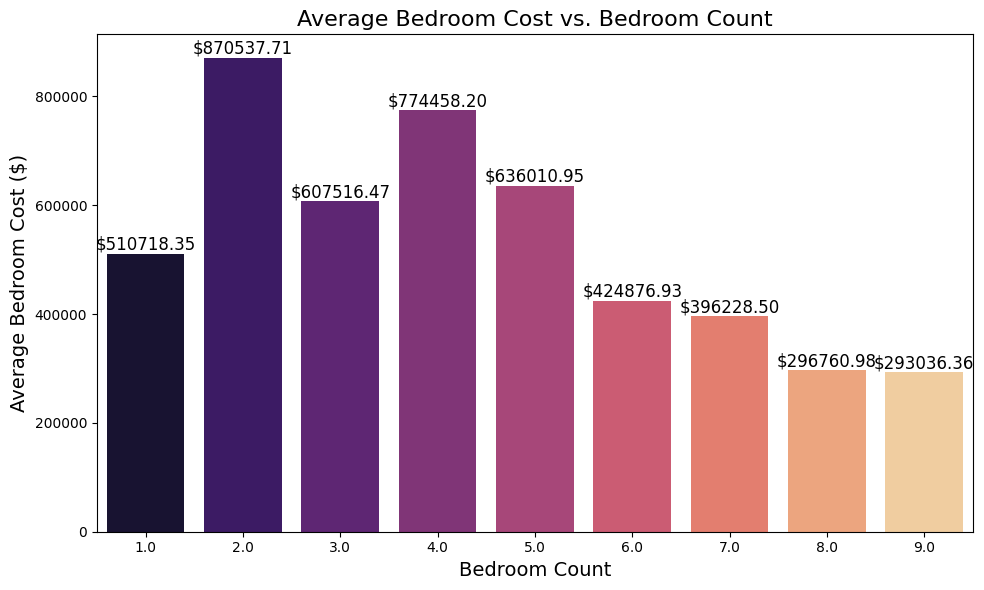

In [315]:
# Calculate the average Bedroom Cost for each bedroom count using aggregation
avg_bedroom_cost = df.groupby('bedroom').agg({'Bedroom_Cost': 'mean'}).reset_index()

# Create a customized bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='bedroom', y='Bedroom_Cost', data=avg_bedroom_cost, palette='magma')  # Changed colormap to 'magma'
plt.title("Average Bedroom Cost vs. Bedroom Count", fontsize=16)
plt.xlabel("Bedroom Count", fontsize=14)
plt.ylabel("Average Bedroom Cost ($)", fontsize=14)


for index, value in enumerate(avg_bedroom_cost['Bedroom_Cost']):
    plt.text(index, value + 200, f'${value:.2f}', ha='center', va='bottom', fontsize=12, color='black')


plt.tight_layout()
plt.show()


In [221]:
df['total_price'] = df['price-per-sqft-$'] * df['total_sqft']

In [222]:
df['total_price'] = df['total_price'].round(2)

In [223]:
print(df[['total_price','price-per-sqft-$']].corr())

                  total_price  price-per-sqft-$
total_price          1.000000          0.957794
price-per-sqft-$     0.957794          1.000000


In [224]:
df['balcony'].unique()


array([1.        , 3.        , 1.58434304, 2.        , 0.        ])

# Outlier Handling for Bath, Bedroom columns

In [225]:
numerical_columns = [ 'bath','bedroom']
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers_iqr = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

# Filter out the rows containing outliers
outliers_data_iqr = df[outliers_iqr.any(axis=1)]

In [226]:
print(outliers_data_iqr)

          ID  size  total_sqft  bath   balcony  buying or not buying BER  \
1          1     4      2600.0   5.0  3.000000                     0   D   
9          9     6      1020.0   6.0  1.584343                     1   C   
11        11     4      2785.0   5.0  3.000000                     1   B   
22        22     4      2800.0   5.0  2.000000                     0   D   
45        45     8       600.0   9.0  1.584343                     0   G   
...      ...   ...         ...   ...       ...                   ...  ..   
13303  13303     5       774.0   5.0  3.000000                     0   A   
13306  13306     4      1200.0   5.0  1.584343                     0   E   
13311  13311     7      1500.0   9.0  2.000000                     1   F   
13315  13315     5      3453.0   4.0  0.000000                     1   B   
13316  13316     4      3600.0   5.0  1.584343                     0   A   

       Renovation needed  price-per-sqft-$  BER_encoded  ...  bedroom  \
1             

In [227]:
df['bath'].unique()

array([2., 5., 3., 4., 6., 1., 9., 8., 7.])

In [228]:
print(Q1)

bath       2.0
bedroom    2.0
Name: 0.25, dtype: float64


In [229]:
print(Q3)

bath       3.0
bedroom    3.0
Name: 0.75, dtype: float64


# Using interquartile method for treating outliers

In [316]:


# Calculate Q1, Q3, and IQR
Q1_bath = np.percentile(df['bath'], 25)
Q3_bath = np.percentile(df['bath'], 75)
IQR_bath = Q3_bath - Q1_bath

# Calculate the lower and upper bounds
lower_bound_bath = Q1_bath - 1.5 * IQR_bath
upper_bound_bath = Q3_bath + 1.5 * IQR_bath

# Identify outliers
outliers_bath = df[(df['bath'] < lower_bound_bath) | (df['bath'] > upper_bound_bath)]

In [231]:
print(upper_bound_bath)

4.5


In [232]:
print(lower_bound_bath)

0.5


In [233]:
Q1_bedrooms_numeric = np.percentile(df['bath'], 25)
Q3_bedrooms_numeric = np.percentile(df['bath'], 75)
IQR_bedrooms_numeric  = Q3_bedrooms_numeric  - Q1_bedrooms_numeric

# Calculate the lower and upper bounds
lower_bound_bedrooms_numeric  = Q1_bedrooms_numeric  - 1.5 * IQR_bedrooms_numeric
upper_bound_bedrooms_numeric = Q3_bedrooms_numeric + 1.5 * IQR_bedrooms_numeric

# Identify outliers
outliers_bedrooms_numeric  = df[(df['bath'] < lower_bound_bedrooms_numeric) | (df['bath'] > upper_bound_bedrooms_numeric )]

In [234]:
print(upper_bound_bedrooms_numeric)

4.5


In [235]:
print(lower_bound_bedrooms_numeric)

0.5


In [317]:




# Step 1: Calculate the IQR for 'bedrooms_numeric' and 'bath'
Q1_bedrooms = df['bedroom'].quantile(0.25)
Q3_bedrooms = df['bedroom'].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

Q1_bath = df['bath'].quantile(0.25)
Q3_bath = df['bath'].quantile(0.75)
IQR_bath = Q3_bath - Q1_bath

# Step 2: Calculate the upper and lower bounds
lower_bound_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

lower_bound_bath = Q1_bath - 1.5 * IQR_bath
upper_bound_bath = Q3_bath + 1.5 * IQR_bath


In [237]:
df.head()

,ID,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,BER_encoded,...,bedroom,rooms_per_sqft,space_utilization,total_sqft_bedrooms_interaction,bath_per_bedroom,room_area_per_sqft,Bedroom_Cost,total_sqft_log,total_sqft_capped,total_price
0,0,2,1056.0,2.0,1.0,0,A,0,419.928030,1,...,2.0,0.001894,0.002841,2112.0,1.000000,0.003788,221722.00,6.963190,6.963190,443444.0
1,1,4,2600.0,5.0,3.0,0,D,1,523.846154,4,...,4.0,0.001538,0.002692,10400.0,1.250000,0.003462,340500.00,7.863651,7.863651,1362000.0
2,2,3,1440.0,2.0,3.0,0,G,1,488.680556,7,...,3.0,0.002083,0.004167,4320.0,0.666667,0.003472,234566.67,7.273093,7.273093,703700.0
3,3,3,1521.0,3.0,1.0,0,G,1,708.908613,7,...,3.0,0.001972,0.002630,4563.0,1.000000,0.003945,359416.67,7.327781,7.327781,1078250.0
4,4,2,1200.0,2.0,1.0,0,F,1,482.375000,6,...,2.0,0.001667,0.002500,2400.0,1.000000,0.003333,289425.00,7.090910,7.090910,578850.0


In [238]:
print(df[['room_area_per_sqft','price-per-sqft-$']].corr())

                    room_area_per_sqft  price-per-sqft-$
room_area_per_sqft             1.00000           0.26058
price-per-sqft-$               0.26058           1.00000


# More Feature engineering

In [239]:
df['rooms_per_sqft'] = df['bedroom'] / df['total_sqft']

In [240]:
df['price_per_bedroom'] = df['total_price'] / df['bedroom']

In [241]:
print(df[['price_per_bedroom','price-per-sqft-$']].corr())

                   price_per_bedroom  price-per-sqft-$
price_per_bedroom           1.000000          0.964462
price-per-sqft-$            0.964462          1.000000


In [242]:
df.drop('price_per_bedroom',axis=1,inplace=True)

In [243]:
df['price_per_bathroom'] = df['total_price'] / df['bath']

In [244]:
print(df[['price_per_bathroom','price-per-sqft-$']].corr())

                    price_per_bathroom  price-per-sqft-$
price_per_bathroom            1.000000          0.960557
price-per-sqft-$              0.960557          1.000000


In [245]:
df['price_efficiency'] = df['total_price'] / df['space_utilization']

In [246]:
print(df[['price_efficiency','price-per-sqft-$']].corr())


                  price_efficiency  price-per-sqft-$
price_efficiency          1.000000          0.928028
price-per-sqft-$          0.928028          1.000000


In [247]:
df['space_cost_efficiency'] = df['Bedroom_Cost'] * df['space_utilization']


In [248]:
print(df[['space_cost_efficiency','price-per-sqft-$']].corr())

                       space_cost_efficiency  price-per-sqft-$
space_cost_efficiency               1.000000          0.995468
price-per-sqft-$                    0.995468          1.000000


In [249]:
df.drop('space_cost_efficiency',axis=1,inplace=True)

In [250]:
df.head()

,ID,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,BER_encoded,...,space_utilization,total_sqft_bedrooms_interaction,bath_per_bedroom,room_area_per_sqft,Bedroom_Cost,total_sqft_log,total_sqft_capped,total_price,price_per_bathroom,price_efficiency
0,0,2,1056.0,2.0,1.0,0,A,0,419.928030,1,...,0.002841,2112.0,1.000000,0.003788,221722.00,6.963190,6.963190,443444.0,221722.000000,1.560923e+08
1,1,4,2600.0,5.0,3.0,0,D,1,523.846154,4,...,0.002692,10400.0,1.250000,0.003462,340500.00,7.863651,7.863651,1362000.0,272400.000000,5.058857e+08
2,2,3,1440.0,2.0,3.0,0,G,1,488.680556,7,...,0.004167,4320.0,0.666667,0.003472,234566.67,7.273093,7.273093,703700.0,351850.000000,1.688880e+08
3,3,3,1521.0,3.0,1.0,0,G,1,708.908613,7,...,0.002630,4563.0,1.000000,0.003945,359416.67,7.327781,7.327781,1078250.0,359416.666667,4.100046e+08
4,4,2,1200.0,2.0,1.0,0,F,1,482.375000,6,...,0.002500,2400.0,1.000000,0.003333,289425.00,7.090910,7.090910,578850.0,289425.000000,2.315400e+08


In [251]:
df['price_efficiency'] = df['price_efficiency'].round(2)

# Dropping the columns which are not needed

In [252]:
df.drop('ID',axis=1,inplace=True)

In [253]:
df.head()

,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,BER_encoded,location_Dun Laoghaire,...,space_utilization,total_sqft_bedrooms_interaction,bath_per_bedroom,room_area_per_sqft,Bedroom_Cost,total_sqft_log,total_sqft_capped,total_price,price_per_bathroom,price_efficiency
0,2,1056.0,2.0,1.0,0,A,0,419.928030,1,0,...,0.002841,2112.0,1.000000,0.003788,221722.00,6.963190,6.963190,443444.0,221722.000000,1.560923e+08
1,4,2600.0,5.0,3.0,0,D,1,523.846154,4,0,...,0.002692,10400.0,1.250000,0.003462,340500.00,7.863651,7.863651,1362000.0,272400.000000,5.058857e+08
2,3,1440.0,2.0,3.0,0,G,1,488.680556,7,1,...,0.004167,4320.0,0.666667,0.003472,234566.67,7.273093,7.273093,703700.0,351850.000000,1.688880e+08
3,3,1521.0,3.0,1.0,0,G,1,708.908613,7,0,...,0.002630,4563.0,1.000000,0.003945,359416.67,7.327781,7.327781,1078250.0,359416.666667,4.100046e+08
4,2,1200.0,2.0,1.0,0,F,1,482.375000,6,0,...,0.002500,2400.0,1.000000,0.003333,289425.00,7.090910,7.090910,578850.0,289425.000000,2.315400e+08


In [254]:
df.drop('size',axis=1,inplace=True)

In [255]:
df.head()

,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$,BER_encoded,location_Dun Laoghaire,location_Fingal,...,space_utilization,total_sqft_bedrooms_interaction,bath_per_bedroom,room_area_per_sqft,Bedroom_Cost,total_sqft_log,total_sqft_capped,total_price,price_per_bathroom,price_efficiency
0,1056.0,2.0,1.0,0,A,0,419.928030,1,0,1,...,0.002841,2112.0,1.000000,0.003788,221722.00,6.963190,6.963190,443444.0,221722.000000,1.560923e+08
1,2600.0,5.0,3.0,0,D,1,523.846154,4,0,0,...,0.002692,10400.0,1.250000,0.003462,340500.00,7.863651,7.863651,1362000.0,272400.000000,5.058857e+08
2,1440.0,2.0,3.0,0,G,1,488.680556,7,1,0,...,0.004167,4320.0,0.666667,0.003472,234566.67,7.273093,7.273093,703700.0,351850.000000,1.688880e+08
3,1521.0,3.0,1.0,0,G,1,708.908613,7,0,0,...,0.002630,4563.0,1.000000,0.003945,359416.67,7.327781,7.327781,1078250.0,359416.666667,4.100046e+08
4,1200.0,2.0,1.0,0,F,1,482.375000,6,0,0,...,0.002500,2400.0,1.000000,0.003333,289425.00,7.090910,7.090910,578850.0,289425.000000,2.315400e+08


In [256]:
df.shape

(13016, 24)

# Data Visualisations

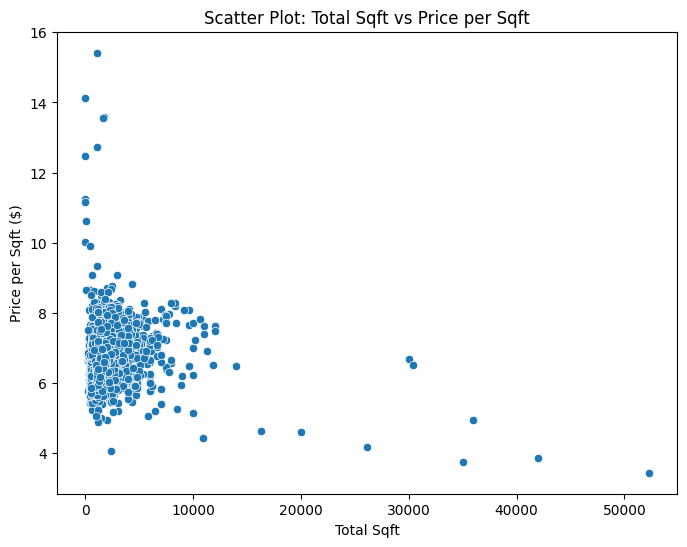

In [302]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price-per-sqft-$', data=df)
plt.title("Scatter Plot: Total Sqft vs Price per Sqft")
plt.xlabel("Total Sqft")
plt.ylabel("Price per Sqft ($)")
plt.show()

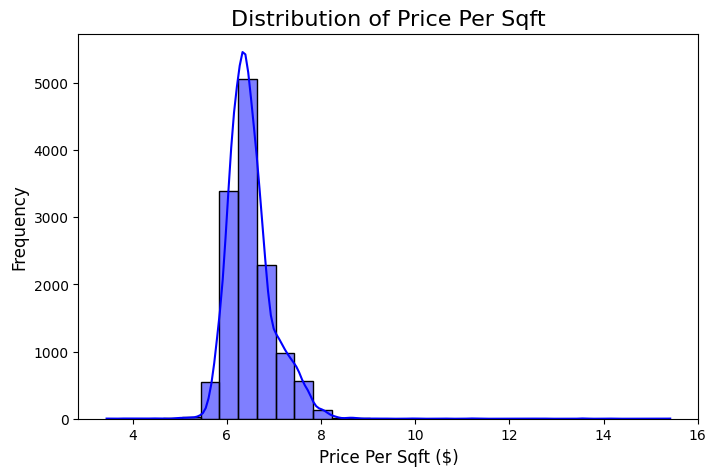

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of price-per-sqft
plt.figure(figsize=(8, 5))
sns.histplot(df['price-per-sqft-$'], kde=True, bins=30, color='blue')
plt.title('Distribution of Price Per Sqft', fontsize=16)
plt.xlabel('Price Per Sqft ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


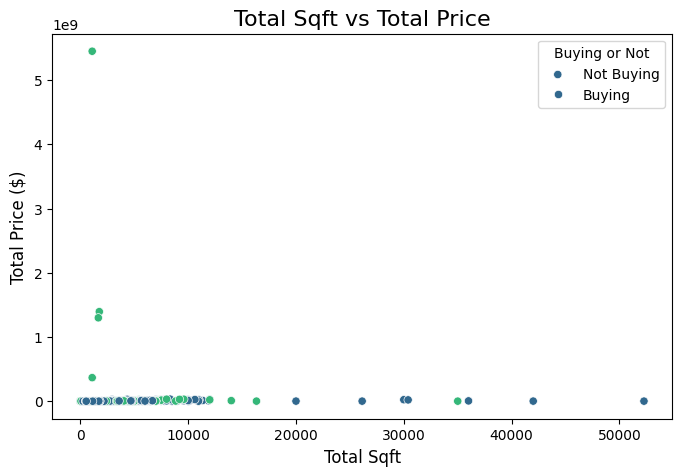

In [304]:
# Scatter plot for total_sqft vs total_price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='total_sqft', y='total_price', hue='buying or not buying', palette='viridis')
plt.title('Total Sqft vs Total Price', fontsize=16)
plt.xlabel('Total Sqft', fontsize=12)
plt.ylabel('Total Price ($)', fontsize=12)
plt.legend(title='Buying or Not', labels=['Not Buying', 'Buying'])
plt.show()


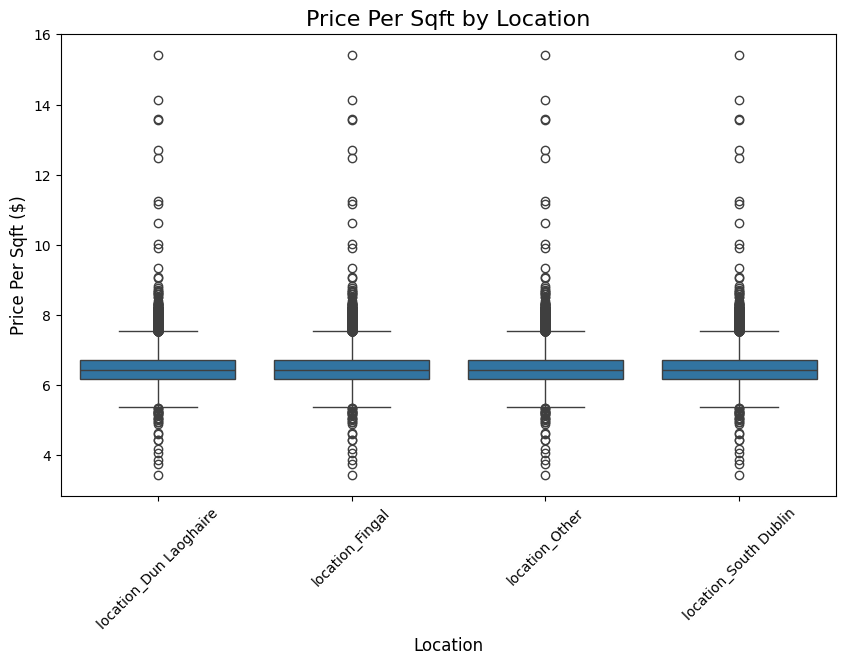

In [305]:
# Boxplot of price-per-sqft by location
location_cols = [col for col in df.columns if col.startswith('location_')]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.melt(id_vars=['price-per-sqft-$'], value_vars=location_cols),
            x='variable', y='price-per-sqft-$')
plt.title('Price Per Sqft by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Price Per Sqft ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


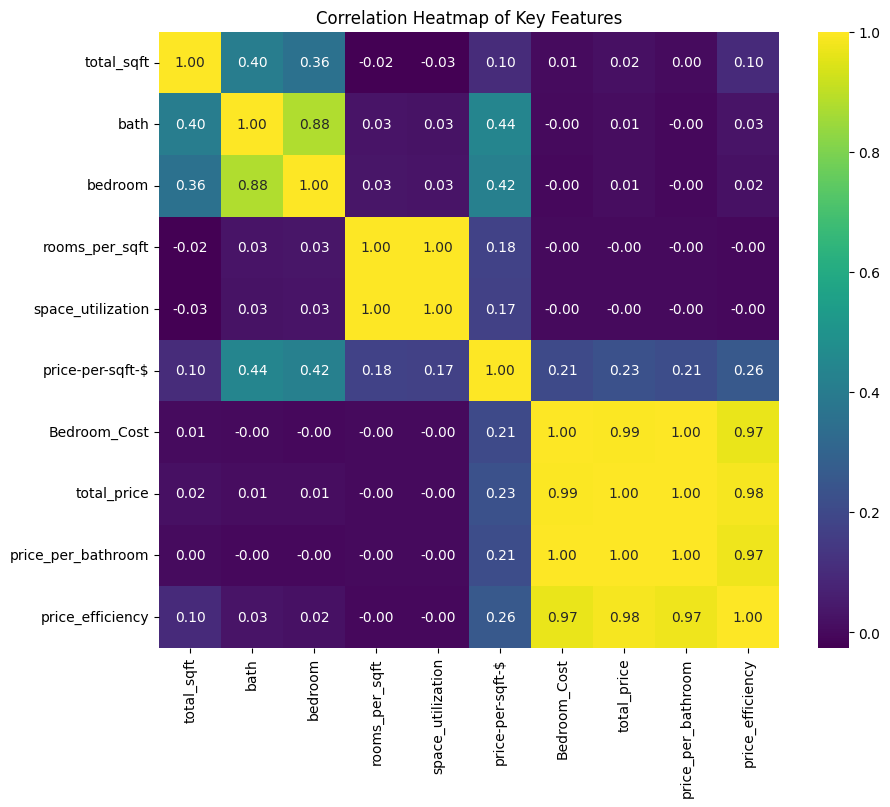

In [306]:
# Select numeric columns for correlation heatmap
numeric_columns = ['total_sqft', 'bath', 'bedroom', 'rooms_per_sqft',
                   'space_utilization', 'price-per-sqft-$', 'Bedroom_Cost',
                   'total_price', 'price_per_bathroom', 'price_efficiency']

# Compute correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Correlation Heatmap of Key Features")
plt.show()


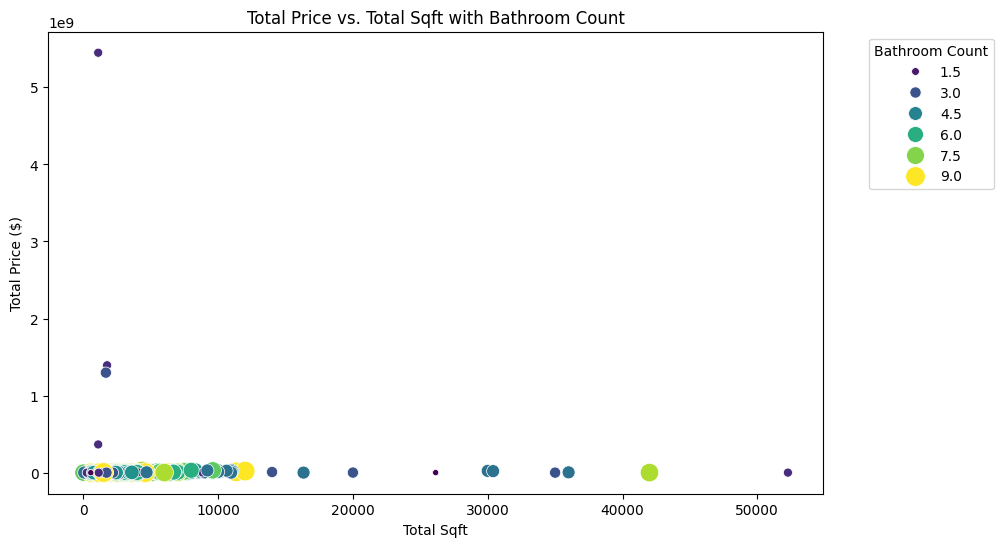

In [307]:
# Scatter plot for total price vs total sqft colored by bathroom count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='total_price', hue='bath', size='bath', data=df, palette="viridis", sizes=(20, 200))
plt.title("Total Price vs. Total Sqft with Bathroom Count")
plt.xlabel("Total Sqft")
plt.ylabel("Total Price ($)")
plt.legend(title="Bathroom Count", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


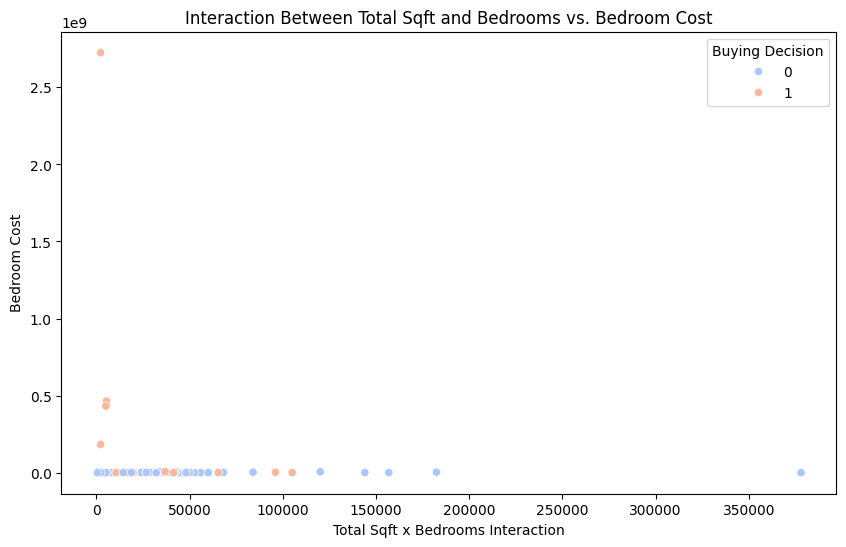

In [308]:
# Interaction feature scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft_bedrooms_interaction', y='Bedroom_Cost', hue='buying or not buying', data=df, palette="coolwarm")
plt.title("Interaction Between Total Sqft and Bedrooms vs. Bedroom Cost")
plt.xlabel("Total Sqft x Bedrooms Interaction")
plt.ylabel("Bedroom Cost")
plt.legend(title="Buying Decision")
plt.show()


<ipython-input-310-9b6c5e061b6a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='balcony', y='price-per-sqft-$', data=df, palette="muted")


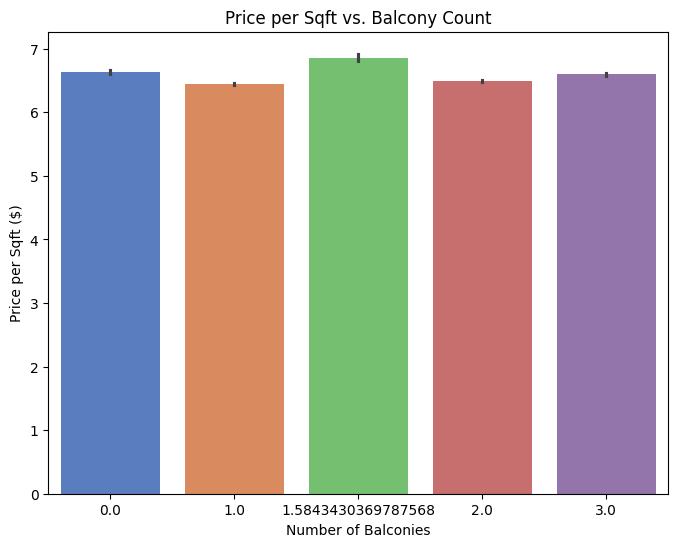

In [310]:
# Barplot for price per sqft based on balcony count
plt.figure(figsize=(8, 6))
sns.barplot(x='balcony', y='price-per-sqft-$', data=df, palette="muted")
plt.title("Price per Sqft vs. Balcony Count")
plt.xlabel("Number of Balconies")
plt.ylabel("Price per Sqft ($)")
plt.show()


<ipython-input-311-5dd122cafb38>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Renovation needed', y='price-per-sqft-$', palette='muted', split=True)


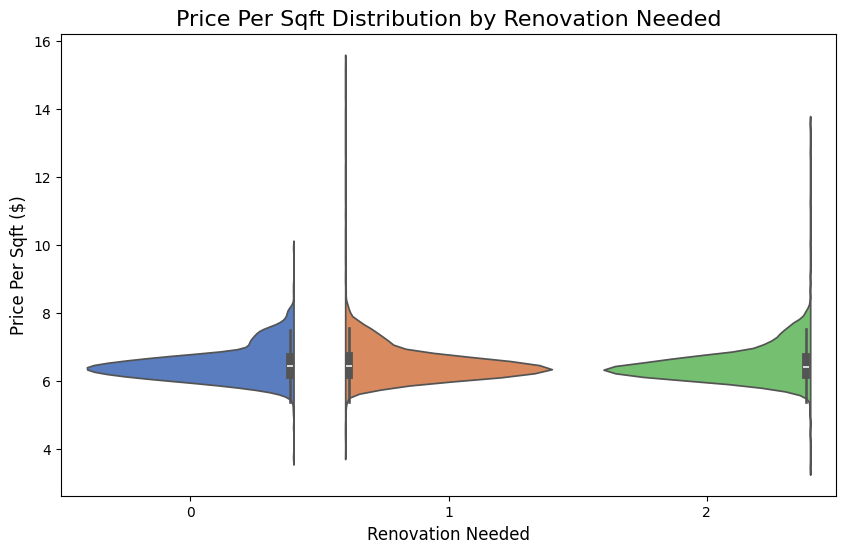

In [311]:
# Violin plot for price-per-sqft by renovation needed
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Renovation needed', y='price-per-sqft-$', palette='muted', split=True)
plt.title('Price Per Sqft Distribution by Renovation Needed', fontsize=16)
plt.xlabel('Renovation Needed', fontsize=12)
plt.ylabel('Price Per Sqft ($)', fontsize=12)
plt.show()


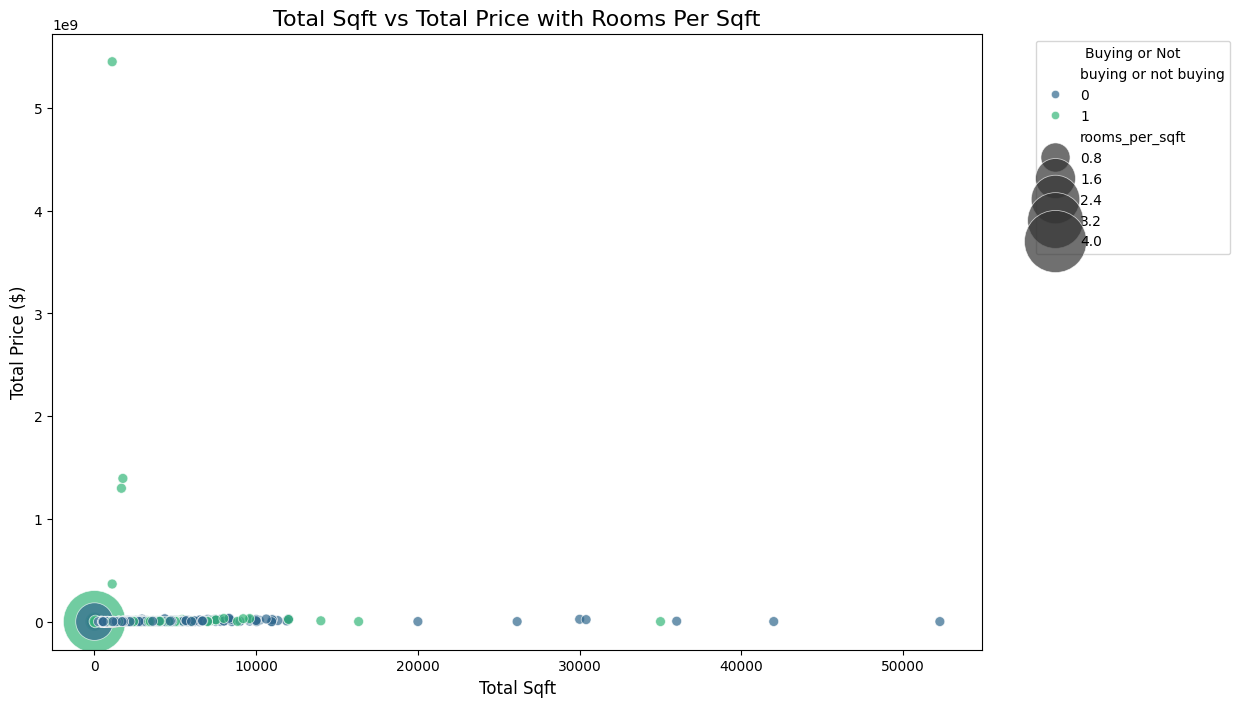

In [312]:
# Bubble plot
plt.figure(figsize=(12, 8))
bubble_sizes = df['rooms_per_sqft'] * 1000  # Scale bubble size
sns.scatterplot(data=df, x='total_sqft', y='total_price', size='rooms_per_sqft',
                hue='buying or not buying', sizes=(50, 2000), alpha=0.7, palette='viridis')
plt.title('Total Sqft vs Total Price with Rooms Per Sqft', fontsize=16)
plt.xlabel('Total Sqft', fontsize=12)
plt.ylabel('Total Price ($)', fontsize=12)
plt.legend(title='Buying or Not', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


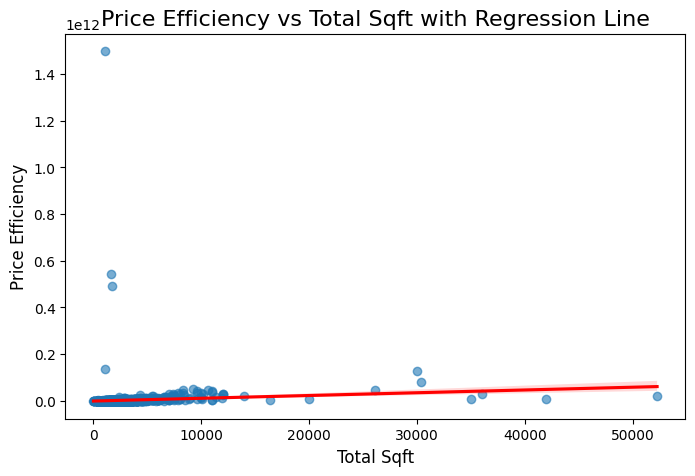

In [313]:
# Regression line for price efficiency vs total sqft
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='total_sqft', y='price_efficiency', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Price Efficiency vs Total Sqft with Regression Line', fontsize=16)
plt.xlabel('Total Sqft', fontsize=12)
plt.ylabel('Price Efficiency', fontsize=12)
plt.show()


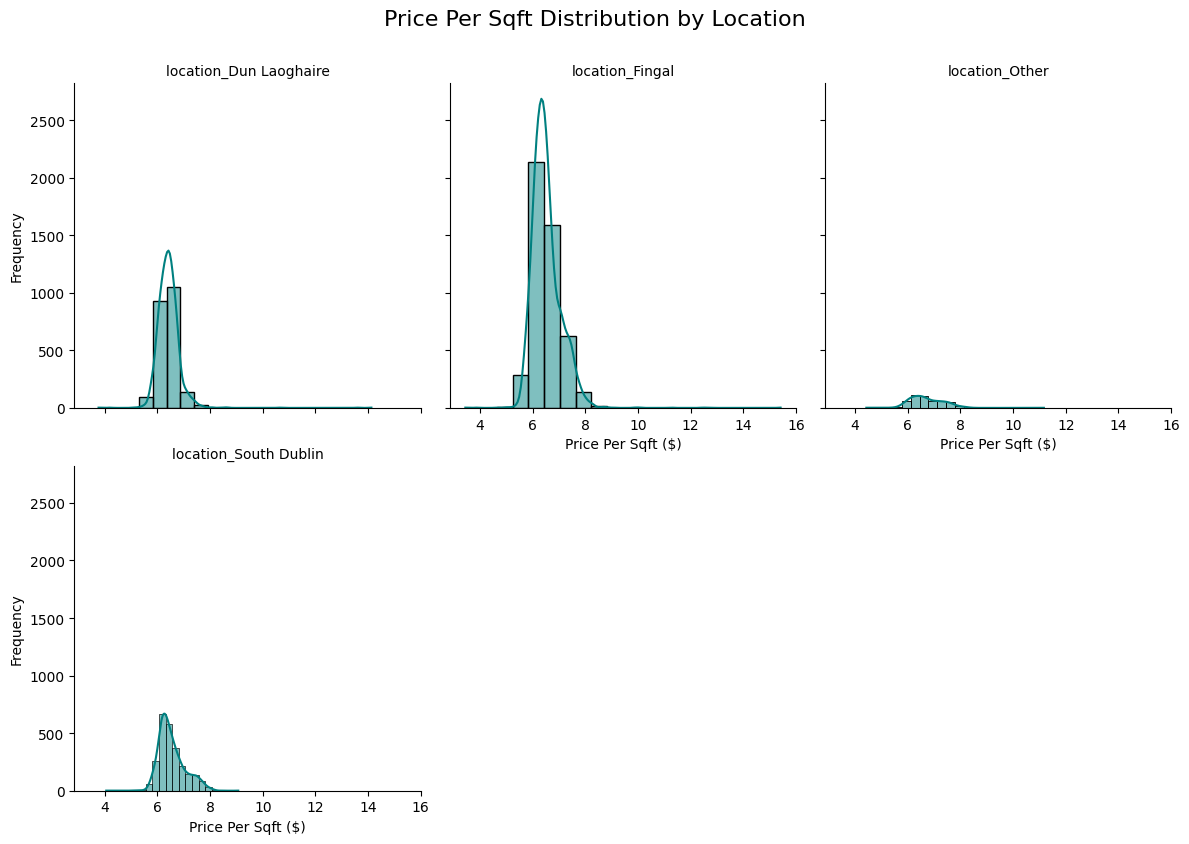

In [314]:
# FacetGrid for price-per-sqft by location
location_cols = [col for col in df.columns if col.startswith('location_')]

melted_data = df.melt(id_vars=['price-per-sqft-$'], value_vars=location_cols)
melted_data = melted_data[melted_data['value'] == 1]  # Filter rows where location is active

g = sns.FacetGrid(melted_data, col='variable', col_wrap=3, height=4, sharey=True)
g.map(sns.histplot, 'price-per-sqft-$', bins=20, kde=True, color='teal')
g.set_titles('{col_name}')
g.set_axis_labels('Price Per Sqft ($)', 'Frequency')
g.fig.suptitle('Price Per Sqft Distribution by Location', y=1.05, fontsize=16)
plt.show()


In [280]:
df.to_csv('transformed_dataset.csv', index=False)

In [281]:



import os

# Save as CSV and confirm
file_path = 'transformed_dataset.csv'
df.to_csv(file_path, index=False)

# Check the saved file's extension
if os.path.splitext(file_path)[1] == '.csv':
    print(f"File '{file_path}' saved successfully as a CSV.")
else:
    print(f"Unexpected file format: {file_path}")

File 'transformed_dataset.csv' saved successfully as a CSV.


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13016 entries, 0 to 13319
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_sqft                       13016 non-null  float64
 1   bath                             13016 non-null  float64
 2   balcony                          13016 non-null  float64
 3   buying or not buying             13016 non-null  int64  
 4   BER                              13016 non-null  object 
 5   Renovation needed                13016 non-null  int64  
 6   price-per-sqft-$                 13016 non-null  float64
 7   BER_encoded                      13016 non-null  int64  
 8   location_Dun Laoghaire           13016 non-null  int64  
 9   location_Fingal                  13016 non-null  int64  
 10  location_Other                   13016 non-null  int64  
 11  location_South Dublin            13016 non-null  int64  
 12  bedroom                

In [283]:
# Drop the 'BER' column
df = df.drop('BER', axis=1)

# Verify the column has been dropped
print(df.head())


   total_sqft  bath  balcony  buying or not buying  Renovation needed  \
0      1056.0   2.0      1.0                     0                  0   
1      2600.0   5.0      3.0                     0                  1   
2      1440.0   2.0      3.0                     0                  1   
3      1521.0   3.0      1.0                     0                  1   
4      1200.0   2.0      1.0                     0                  1   

   price-per-sqft-$  BER_encoded  location_Dun Laoghaire  location_Fingal  \
0        419.928030            1                       0                1   
1        523.846154            4                       0                0   
2        488.680556            7                       1                0   
3        708.908613            7                       0                0   
4        482.375000            6                       0                0   

   location_Other  ...  space_utilization  total_sqft_bedrooms_interaction  \
0               0  .

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13016 entries, 0 to 13319
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_sqft                       13016 non-null  float64
 1   bath                             13016 non-null  float64
 2   balcony                          13016 non-null  float64
 3   buying or not buying             13016 non-null  int64  
 4   Renovation needed                13016 non-null  int64  
 5   price-per-sqft-$                 13016 non-null  float64
 6   BER_encoded                      13016 non-null  int64  
 7   location_Dun Laoghaire           13016 non-null  int64  
 8   location_Fingal                  13016 non-null  int64  
 9   location_Other                   13016 non-null  int64  
 10  location_South Dublin            13016 non-null  int64  
 11  bedroom                          13016 non-null  float64
 12  rooms_per_sqft         

In [285]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for total_sqft and price_per_sqft
Q1_total_sqft = df['total_sqft'].quantile(0.25)
Q3_total_sqft = df['total_sqft'].quantile(0.75)
IQR_total_sqft = Q3_total_sqft - Q1_total_sqft

Q1_price_sqft = df['price-per-sqft-$'].quantile(0.25)
Q3_price_sqft = df['price-per-sqft-$'].quantile(0.75)
IQR_price_sqft = Q3_price_sqft - Q1_price_sqft

# Define lower and upper bounds for detecting outliers
lower_bound_total_sqft = Q1_total_sqft - 1.5 * IQR_total_sqft
upper_bound_total_sqft = Q3_total_sqft + 1.5 * IQR_total_sqft

lower_bound_price_sqft = Q1_price_sqft - 1.5 * IQR_price_sqft
upper_bound_price_sqft = Q3_price_sqft + 1.5 * IQR_price_sqft

# Identify outliers
outliers_total_sqft = df[(df['total_sqft'] < lower_bound_total_sqft) | (df['total_sqft'] > upper_bound_total_sqft)]
outliers_price_sqft = df[(df['price-per-sqft-$'] < lower_bound_price_sqft) | (df['price-per-sqft-$'] > upper_bound_price_sqft)]

print("Outliers for total_sqft:")
print(outliers_total_sqft)

print("\nOutliers for price_per_sqft$: ")
print(outliers_price_sqft)

Outliers for total_sqft:
       total_sqft  bath   balcony  buying or not buying  Renovation needed  \
1          2600.0   5.0  3.000000                     0                  1   
6          2732.0   4.0  1.584343                     0                  0   
7          3300.0   4.0  1.584343                     0                  1   
11         2785.0   5.0  3.000000                     1                  2   
18         2770.0   4.0  2.000000                     0                  2   
...           ...   ...       ...                   ...                ...   
13268      3360.0   5.0  2.000000                     1                  1   
13290      4050.0   2.0  1.000000                     1                  2   
13315      3453.0   4.0  0.000000                     1                  2   
13316      3600.0   5.0  1.584343                     0                  0   
13318      4689.0   4.0  1.000000                     0                  2   

       price-per-sqft-$  BER_encoded  

In [286]:
print(Q3_price_sqft)

831.5791128


In [287]:
print(Q1_total_sqft)

1100.0


In [288]:
print(Q3_total_sqft)

1665.25


In [289]:
print(Q1_price_sqft)

483.9323322


In [290]:
df['total_sqft'].value_counts()

,count
total_sqft,
1200.00,831
1100.00,221
1500.00,203
2400.00,194
600.00,180
...,...
3563.00,1
462.00,1
36000.00,1


In [292]:
df['total_sqft_log'] = np.log1p(df['total_sqft'])

In [318]:
#Thresholds for capping
lower_cap = df['total_sqft_log'].quantile(0.05)  # 5th percentile
upper_cap = df['total_sqft_log'].quantile(0.95)  # 95th percentile

# Apply capping
df['total_sqft_capped'] = df['total_sqft_log']
df.loc[df['total_sqft_log'] < lower_cap, 'total_sqft_capped'] = lower_cap
df.loc[df['total_sqft_log'] > upper_cap, 'total_sqft_capped'] = upper_cap

# Check the result
print(df[['total_sqft_log', 'total_sqft_capped']].describe())

       total_sqft_log  total_sqft_capped
count    13016.000000       13016.000000
mean         7.226623           7.222314
std          0.454263           0.376122
min          0.693147           6.514713
25%          7.003974           7.003974
50%          7.151485           7.151485
75%          7.418331           7.418331
max         10.864235           8.071219


In [294]:
df['price-per-sqft-$'] = np.log1p(df['price-per-sqft-$'])

In [319]:
#Thresholds for capping
lower_cap = df['price-per-sqft-$'].quantile(0.05)  # 5th percentile
upper_cap = df['price-per-sqft-$'].quantile(0.95)  # 95th percentile

# Apply capping
df['price-per-sqft-$'] = df['price-per-sqft-$']
df.loc[df['price-per-sqft-$'] < lower_cap, 'price-per-sqft-$_capped'] = lower_cap
df.loc[df['price-per-sqft-$'] > upper_cap, 'price-per-sqft-$_capped'] = upper_cap

# Check the result
print(df[['price-per-sqft-$', 'price-per-sqft-$_capped']].describe())

       price-per-sqft-$  price-per-sqft-$_capped
count      13016.000000              1297.000000
mean           6.507515                 6.665592
std            0.505966                 0.795280
min            3.446766                 5.872456
25%            6.184009                 5.872456
50%            6.428560                 5.872456
75%            6.724528                 7.462406
max           15.415571                 7.462406


# Coorelation with Price-per-sqft

In [296]:
corr_matrix = df.corr()

# Extract only the correlations with the target variable
target_corr = corr_matrix['price-per-sqft-$'].sort_values(ascending=False)

# Display the correlations
print("Correlations with 'price-per-sqft-$':\n")
print(target_corr)

Correlations with 'price-per-sqft-$':

price-per-sqft-$                   1.000000
price-per-sqft-$_capped            0.899967
bath                               0.439461
bedroom                            0.416524
price_efficiency                   0.255048
total_price                        0.227795
total_sqft_capped                  0.217820
price_per_bathroom                 0.212282
Bedroom_Cost                       0.205875
rooms_per_sqft                     0.176876
room_area_per_sqft                 0.175981
space_utilization                  0.174736
total_sqft_bedrooms_interaction    0.158683
total_sqft_log                     0.144288
bath_per_bedroom                   0.120178
total_sqft                         0.102474
location_Other                     0.077144
balcony                            0.035519
location_South Dublin              0.030771
location_Fingal                    0.029327
BER_encoded                        0.010611
buying or not buying              -0.

# Model Training and Testing

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# List of selected columns
selected_columns = [
    "bath",
    "bedroom",
    "price_efficiency",
    "total_price",
    "price_per_bathroom",
    "Bedroom_Cost",
    "rooms_per_sqft",
    "room_area_per_sqft",
    "space_utilization"
]

# Extract the selected features and target variable
X = df[selected_columns]
y = df["price-per-sqft-$"]  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for clarity (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_columns)

# Split the standardized data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Display the shape of the datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (10412, 9)
Testing Features Shape: (2604, 9)
Training Target Shape: (10412,)
Testing Target Shape: (2604,)


## K Nearest Neighbor(KNN)

In [298]:
from sklearn.neighbors import KNeighborsRegressor

# Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression MSE: {mse_knn}")
print(f"KNN Regression R²: {r2_knn}")

KNN Regression MSE: 0.08570193381631756
KNN Regression R²: 0.7217968141004729


# GradientBoosting

In [299]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
model_gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model_gbm.fit(X_train, y_train)

# Make predictions
y_pred_gbm = model_gbm.predict(X_test)

# Evaluate the model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f"Mean Squared Error (MSE): {mse_gbm}")
print(f"R-squared (R²): {r2_gbm}")

Mean Squared Error (MSE): 0.03531958697914656
R-squared (R²): 0.8853465588849623


# DecisionTreeS

In [320]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Perform cross-validation for better evaluation
cv_scores = cross_val_score(dt_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores
print("Cross-Validation MSE Scores: ", cv_mse)
print("Average CV MSE: ", cv_mse.mean())

Mean Squared Error (MSE): 0.03862086430819831
R-squared (R²): 0.8746300460878471
Cross-Validation MSE Scores:  [0.05268292 0.00859883 0.00735309 0.00446958 0.00865436]
Average CV MSE:  0.016351754900686313


# Cross Validation Score

In [300]:
from sklearn.model_selection import cross_val_score

# Evaluate with cross-validation
cv_scores = cross_val_score(model_gbm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores: ", -cv_scores)
print("Average MSE: ", -cv_scores.mean())

Cross-Validation MSE Scores:  [0.00361902 0.00329058 0.00414998 0.0072446  0.00576936]
Average MSE:  0.004814707460049142


# Feature Correlation Matrix

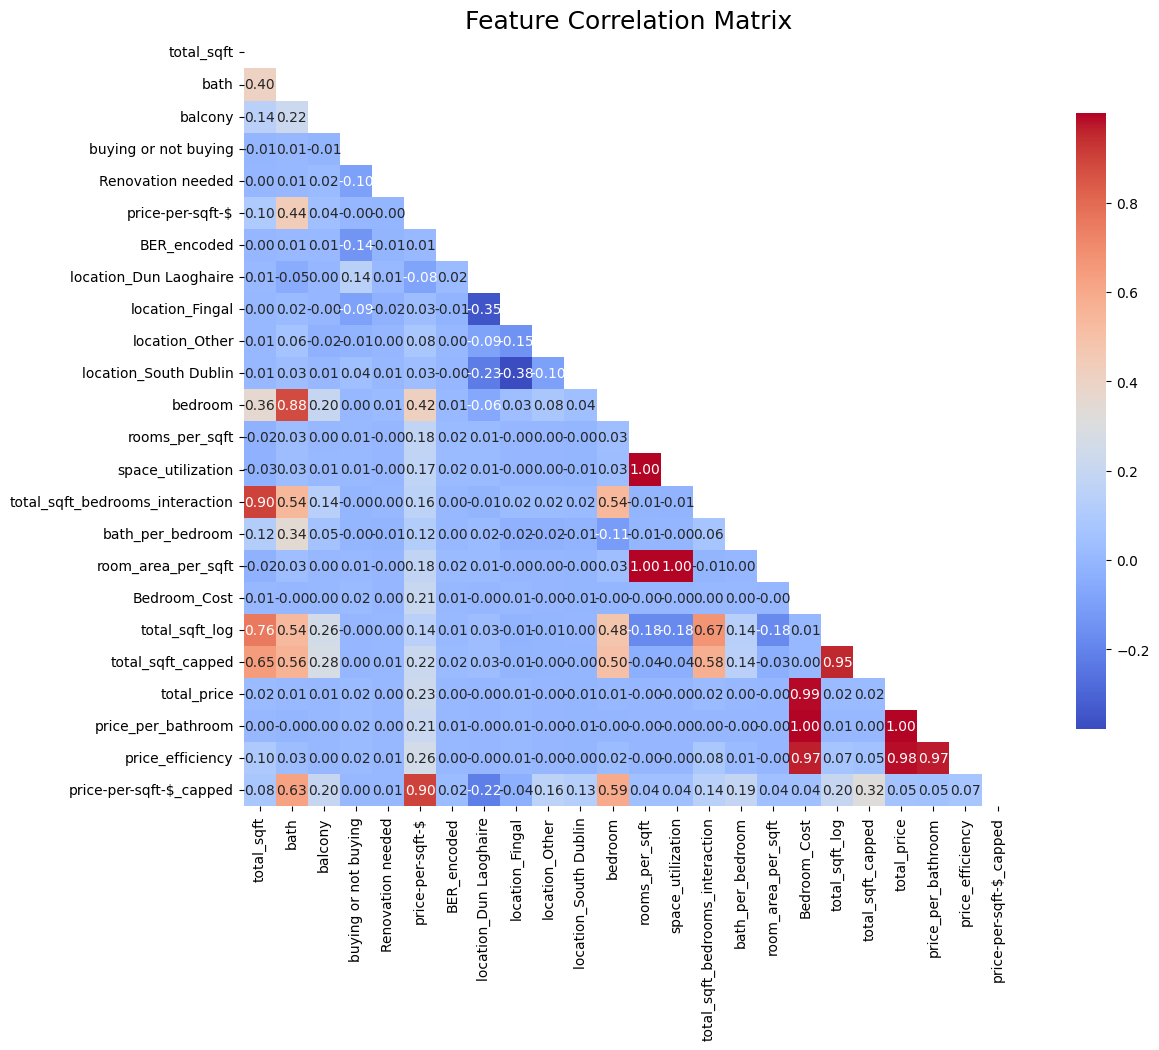

<ipython-input-301-28d9ecd71186>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('plasma', len(sorted_corr))(range(len(sorted_corr)))  # Gradient colors


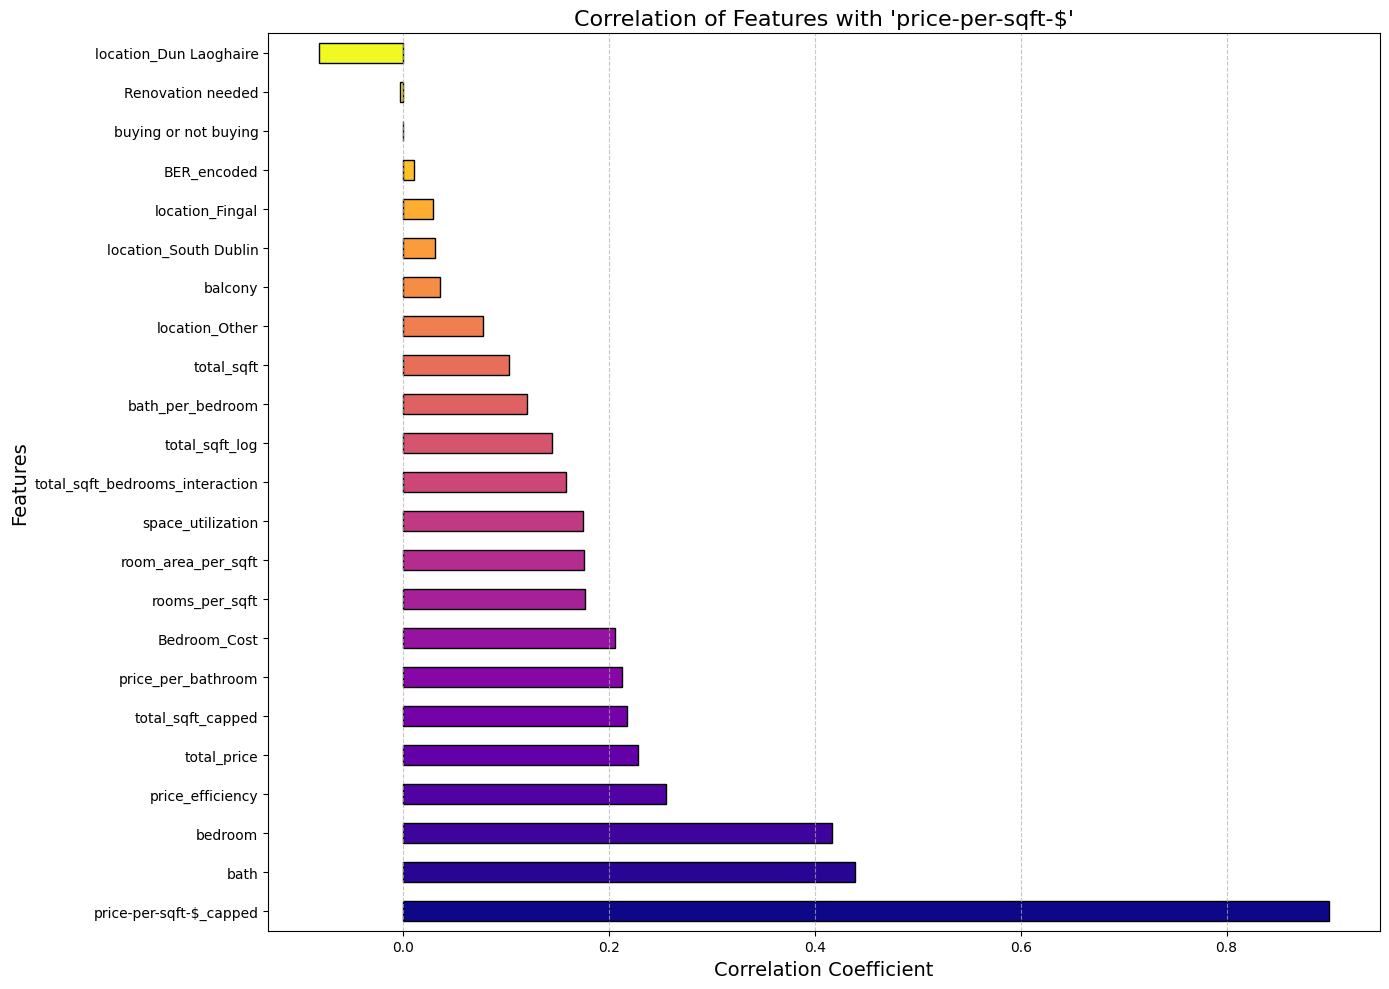

In [301]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlation with the target variable 'price-per-sqft-$'
target_corr = correlation_matrix["price-per-sqft-$"]

# Plot the correlation heatmap with a custom colormap and diagonal masking for better visualization
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle for clarity
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap='coolwarm',  # Changed colormap
    fmt='.2f',
    square=True,
    cbar_kws={"shrink": 0.8}  # Shrink color bar for aesthetics
)
plt.title('Feature Correlation Matrix', fontsize=18)
plt.show()

# Visualize correlations of the target variable as a horizontal bar graph with gradient colors
from matplotlib import cm

sorted_corr = target_corr.drop("price-per-sqft-$").sort_values(ascending=False)
colors = cm.get_cmap('plasma', len(sorted_corr))(range(len(sorted_corr)))  # Gradient colors

sorted_corr.plot(
    kind='barh',
    figsize=(14, 10),
    color=colors,
    edgecolor='black'  # Add edge for distinction
)
plt.title("Correlation of Features with 'price-per-sqft-$'", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for clarity
plt.tight_layout()
plt.show()


# Model Comparison

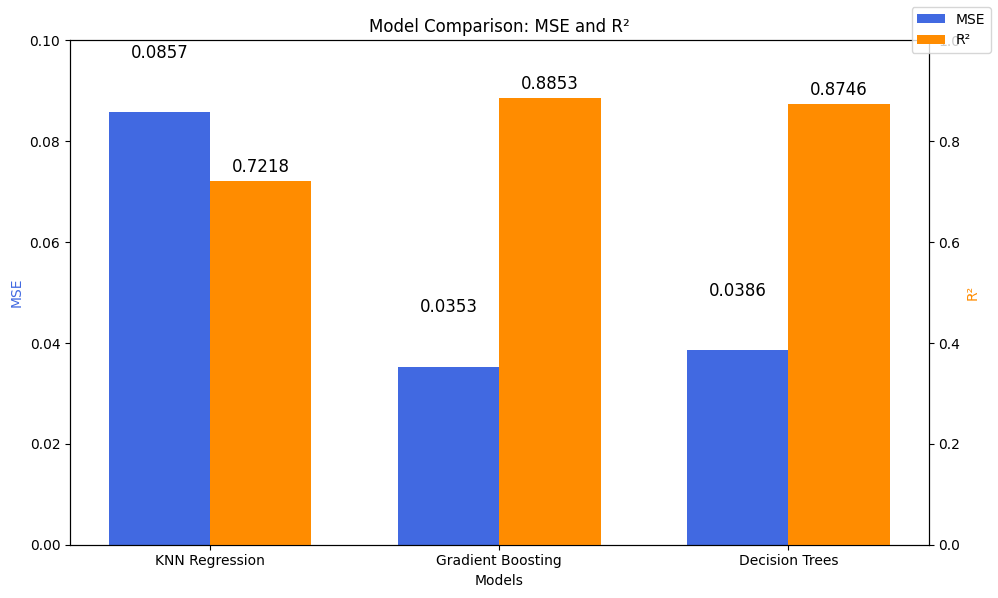

In [323]:


# Model performance data
models = ['KNN Regression', 'Gradient Boosting', 'Decision Trees']
mse_values = [0.08570193381631756, 0.03531958697914656, 0.03862086430819831]
r2_values = [0.7217968141004729, 0.8853465588849623, 0.8746300460878471]

# Set up the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for MSE values
bar_width = 0.35
index = np.arange(len(models))

bar_mse = ax1.bar(index, mse_values, bar_width, label='MSE', color='royalblue')

# Create a second y-axis for R² values
ax2 = ax1.twinx()
bar_r2 = ax2.bar(index + bar_width, r2_values, bar_width, label='R²', color='darkorange')

# Labels and title
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color='royalblue')
ax2.set_ylabel('R²', color='darkorange')
ax1.set_title('Model Comparison: MSE and R²')

# Customize ticks and labels
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models)
ax1.set_ylim(0, 0.1)  # MSE range

ax2.set_ylim(0, 1)  # R² range

# Adding value annotations to the bars
for bar in bar_mse:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=12)

for bar in bar_r2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=12)

# Display the legend and show plot
fig.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Conclusion:
Gradient Boosting is the best model among the three, as it has the lowest MSE (indicating fewer prediction errors) and the highest R² (indicating the best fit to the data). It outperforms both KNN Regression and Decision Trees based on these metrics.